# 06. Social Network Analysis

(ну или около того)

Из презентации мы с вами узнали, что такое графы и для чего они нужны. Давайте теперь посмотрим, как рисовать графы с помощью python

In [1]:
import networkx as nx
import matplotlib.pyplot as plt # нужен для рисования графов и графиков
import math

In [2]:
G = nx.Graph() #создаем пустой граф G = nx.DiGraph() - ориентированный графф

In [3]:
with open("stormofswords.csv", 'r', encoding="utf-8") as f:
    f.readline()
    for line in f:
        node1, node2, weight = line.split(',')
        G.add_edge(node1, node2, weight=int(weight)) #добавить ребро int число, а не строка

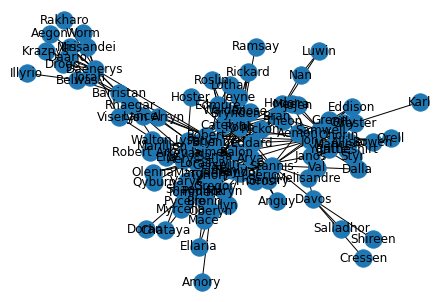

In [4]:
nx.draw(G,with_labels=True)

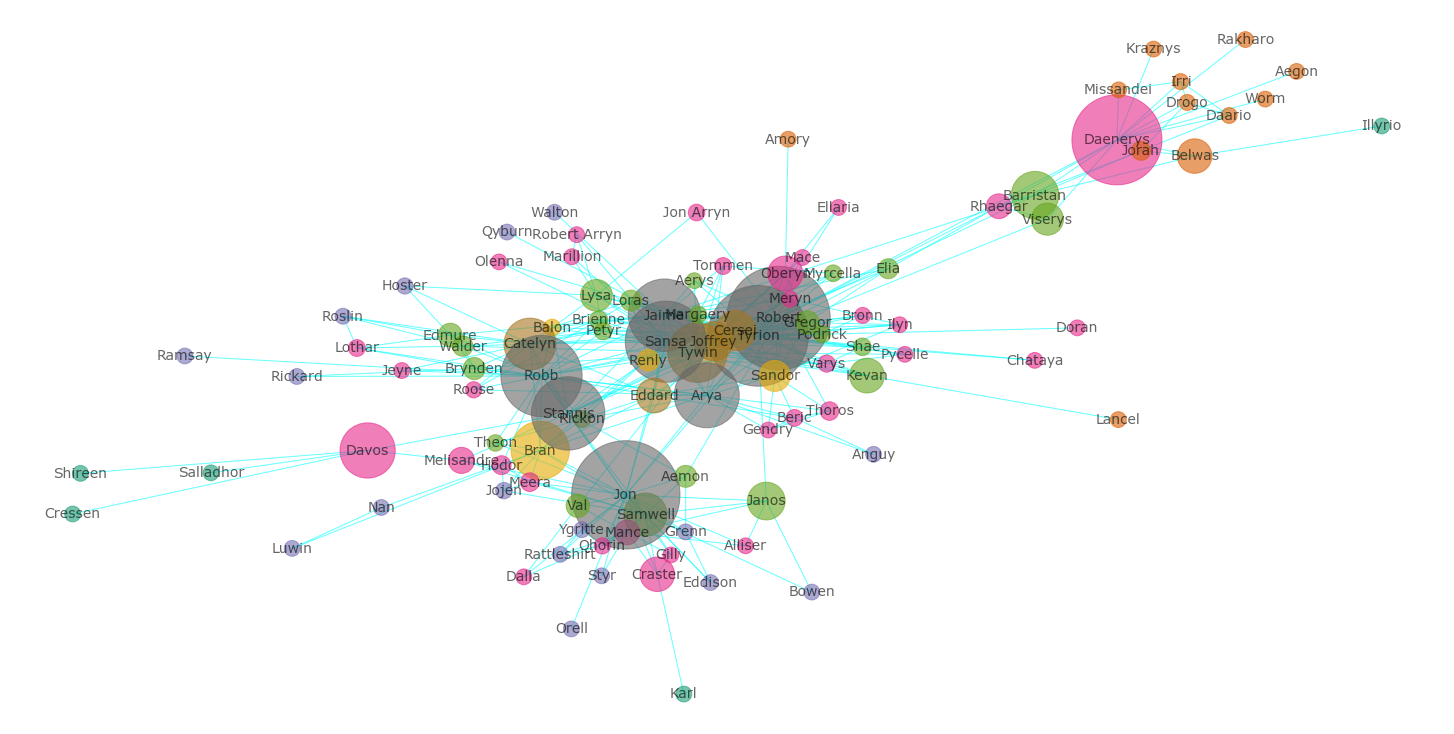

In [5]:
plt.figure(figsize=(20,10)) # это вы должны помнить :)
bc = nx.betweenness_centrality(G) # метрика важности мера центральности в графе, основанная на кратчайших путях. Степень посредничества (betweenness centrality) для каждой вершины равна числу этих кратчайших путей через вершину.
bc = [(bc[i]+0.005) * 50000 for i in G.nodes()] # betweenness_centrality для каждой вершины, это маленькие величины, чтобы размер вершины был более значимый умножим их на некоторое число (просто подобрано)
cc = nx.closeness_centrality(G) # Степень близости узла (к другим узлам) — это мера центральности в сети, вычисляемая как обратная величина суммы длин кратчайших путей между узлом и всеми другими узлами графа. Таким образом, чем более централен узел, тем ближе он ко всем другим узлам.
cc = [cc[i] for i in G.nodes()]  # closeness_centrality для каждой вершины

nx.draw(G, node_size=bc, node_color=cc, with_labels=True,
        edge_color='Cyan', alpha=0.6, font_family='verdana', font_size=14, cmap= plt.cm.Dark2) #альфа это яркость, cmap= plt.cm.Dark2
plt.show()

### Как это может пригодиться в нашем исследовании?

Посмотрим, насколько паблики одной тематики связаны друг с другом:

In [6]:
import vk  # Загружаем библиотеку vk

In [17]:
token = "63e163d363e163d363e163d3af63929ca4663e163e163d33c849b30d5a14a8ec695bb76"  # Сервисный ключ доступа, по завершении дз можно удалить для соблюдения конфиденциальности
session = vk.Session(access_token=token)  # Авторизация
vk_api = vk.API(session)  # Авторизация

In [18]:
personal_token = "694665bc9f22c8045de619f7b0b7221abeacf1946fa2a4b15e22b5537b1d4bda98761659cc5f127a86d3e"
session = vk.Session(access_token=personal_token)  # Авторизация
personal_vk_api = vk.API(session) # Авторизация

In [19]:
def get_members(groupid, fields=()):
    first = vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92)  # Первое выполнение метода
    data = first["items"]  # Присваиваем переменной первую тысячу id'шников
    count = first["count"] // 1000  # Присваиваем переменной количество тысяч участников
    # С каждым проходом цикла смещение offset увеличивается на тысячу
    # и еще тысяча id'шников добавляется к нашему списку.
    for i in range(1, count+1):  
        data = data + vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92, offset=i*1000)["items"]
    return data

In [20]:
def get_groups(query):
    first = personal_vk_api.groups.search(q=query, count=10, type="group", v=5.124) 
    data = first["items"]  # Присваиваем переменной первую тысячу id'шников
    count = first["count"]  # общее количество пабликов по вашему запросу
    return [(i['name'], i['id']) for i in data]

In [21]:
groups = get_groups("русский рок")

In [22]:
groups_with_members = {} #словарик
for name, id_ in groups:
    groups_with_members[name] = set(get_members(id_))

In [23]:
groups_with_members.keys()

dict_keys(['РУССКИЙ РОК', 'ВИКТОР ЦОЙ и Русский Рок', 'rRock.ru - Русский рок : новости, видео и песни', 'Рок Для Души | Русский рок | Зарубежный рок', 'Русский Рок', 'СОВЕТСКИЙ И РУССКИЙ РОК', 'Русский рок. Цитаты.', 'VESPERCELLOS: Русский рок на виолончелях', 'Русский Рок Battles ! Рок-чарт!'])

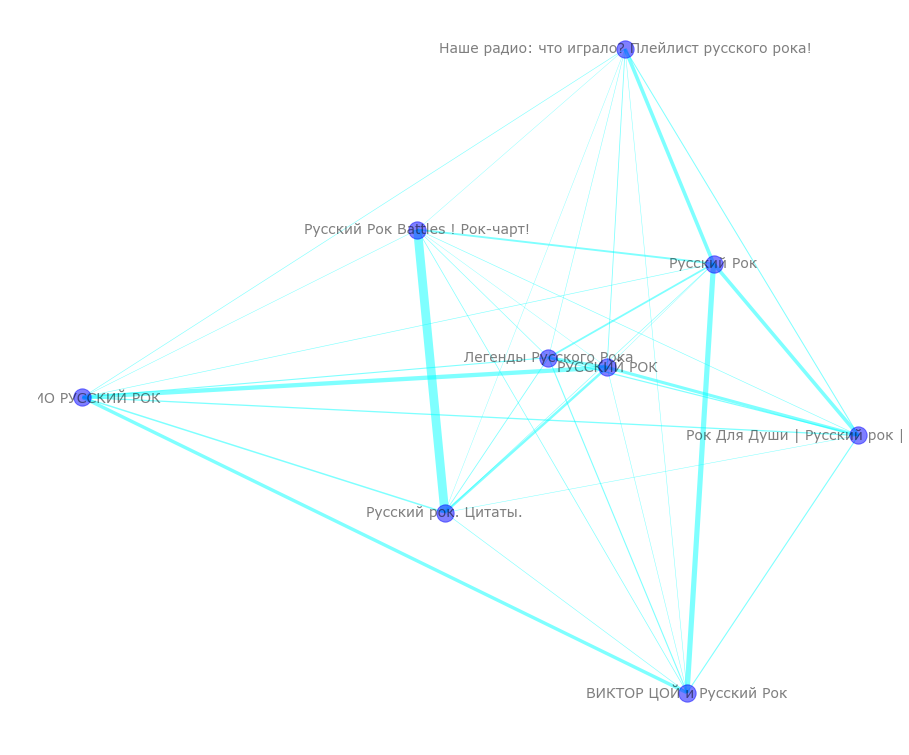

In [136]:
weights = [G[u][v]['weight']*0.1 for u,v in G.edges()]

plt.figure(figsize=(12,10))
nx.draw(G_rock, with_labels=True, alpha=0.5, font_family='verdana', node_color="Blue", edge_color='Cyan', font_size=14, width=weights)
plt.show()

## А что еще можно делать с вк и графами? 

Можно построить граф своих друзей vk, используя [приложение](https://vk.com/app3861133)

**TODO:** переименовать дубликаты, DELETED, удалить [objet Object]

In [25]:
G_friends = nx.read_gexf("vk-friends-102633277.gexf", node_type=int, relabel=True, version="1.2draft")

FileNotFoundError: [Errno 2] No such file or directory: 'vk-friends-102633277.gexf'

In [79]:
plt.figure(figsize=(120,100))
nx.draw(G_friends, with_labels=True, alpha=0.5, font_family='verdana',  edge_color="yellow", font_size=14)
plt.savefig("my_graph.svg", dpi=1000)